# Machine Learning Engineering

CSI 4106 - Fall 2025

Marcel Turcotte  
Version: Jul 10, 2025 15:54

# Preamble

## Quote of the Day

[Clément
Delangue](https://time.com/collection/time100-ai/6308994/clement-delangue/#:~:text=Clément%20Delangue%20is%20the,%2C%20datasets%2C%20and%20best%20practices.),
[Hugging Face](https://huggingface.co) CEO, discusses AI for good.
Specifically, the development by IBM and NASA of an open-source AI model
for weather and climate analysis.

## Learning Objectives

1.  **Data Size and Its Impact:**
    -   Recognize the influence of dataset size on model performance.
    -   Discuss the concept of data augmentation and its role in
        improving model robustness.
    -   Explore the “unreasonable effectiveness of data” in machine
        learning.
2.  **Feature Engineering and Encoding:**
    -   Explain the importance of feature extraction and the role of
        domain knowledge.
    -   Compare different methods for encoding categorical data, such as
        one-hot encoding and ordinal encoding.
    -   Justify the choice of encoding methods based on the nature of
        the data and the problem.
3.  **Data Preprocessing Techniques:**
    -   Apply normalization and standardization for feature scaling.
    -   Decide when to use normalization versus standardization based on
        data characteristics.
    -   Handle missing values using various imputation strategies and
        understand their implications.
4.  **Addressing Class Imbalance:**
    -   Define the class imbalance problem and its impact on model
        performance.
    -   Explore solutions like resampling, algorithmic adjustments, and
        synthetic data generation (e.g., SMOTE).
    -   Understand the importance of applying these techniques
        appropriately to avoid data leakage.
5.  **Integrate Knowledge in Practical Applications:**
    -   Apply the learned concepts to real-world datasets (e.g., OpenML
        datasets like ‘diabetes’ and ‘adult’).
    -   Interpret and analyze the results of model evaluations and
        experiments.
    -   Develop a comprehensive understanding of the end-to-end machine
        learning pipeline.

The above learning objectives have been generated by OpenAI’s model,
[o1](https://openai.com/index/introducing-openai-o1-preview/), based on
the lecture content.

# Data

## Size does matter

“However, these results suggest that we may want to reconsider the
trade-off between spending time and money on algorithm development
versus **spending it on corpus development** algorithms themselves.”

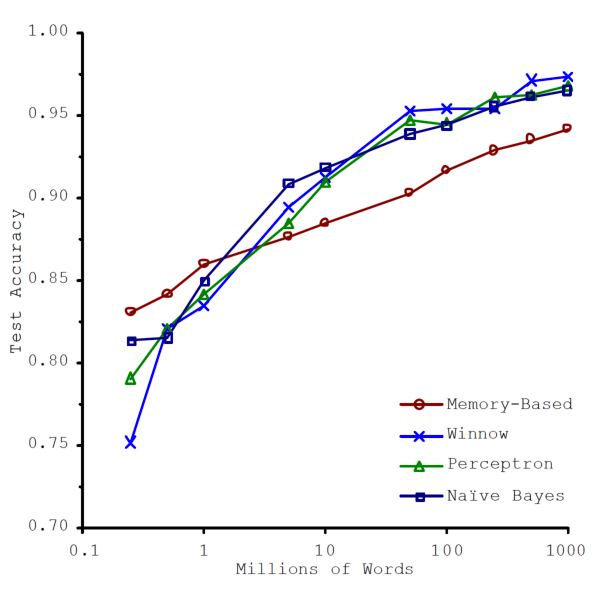

**Attribution**: Banko and Brill (2001)

## Unreasonable Effectiveness of Data

<https://youtu.be/yvDCzhbjYWs>

Halevy, Norvig, and Pereira (2009) and Kaplan et al. (2020).

Peter Norvig’s presentation, titled “The Unreasonable Effectiveness of
Data,” runs for just over one hour. It is noteworthy that the paper on
which the presentation is based was published in 2009, predating the
success of AlexNet.

The substantial improvements observed with AlexNet in 2012 highlighted
the benefits of training deep neural networks on large image datasets.

Similarly, modern models like GPT, Gemini, Claude, and LLaMA have
achieved significant advancements in language capabilities by training
on vast amounts of text data, encompassing nearly all written material
since the inception of human civilization.

**Neural scaling laws** describe how the performance of neural networks
varies with changes in key factors such as dataset size, number of
parameters, and computational cost Kaplan et al. (2020).

## Definition

**Data augmentation** is a technique used to increase the diversity of a
dataset by applying various transformations to the existing data.

**Purpose**: Enhance the robustness and generalization capability of
machine learning models.

## Data Augmentation

-   **For Images**: Rotations, translations, scaling, flipping, adding
    noise, etc.
    -   [How to find ancient geoglyphs using machine
        learning?](https://youtube.com/shorts/DA_-6296G5o), Sakai et al.
        (2024)
-   **For Text**: Synonym replacement, random insertion, deletion, and
    swapping of words.

**Generative Adversarial Networks (GANs)** (a form of deep learning) can
be used to generate new, synthetic data that mimics the distribution of
the original dataset.

See also: Shumailov et al. (2024).

# Machine Learning Engineering

## Machine Learning Engineering

1.  Gather **adequate** data.
2.  Extract **features** from the raw data:
    -   This process is **labor-intensive**.
    -   It necessitates **creativity**.
    -   **Domain knowledge** is highly beneficial.

## Dataset - Adult

In [1]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import fetch_openml

adult = fetch_openml(name='adult', version=2)
print(adult.DESCR)

Le jeu de données ‘Adult’ contient plusieurs attributs caractérisés par
des valeurs catégorielles. Ce jeu de données servira de base pour une
brève discussion sur l’encodage de ces valeurs catégorielles.

## Adult - Workclass

In [2]:
adult.data['workclass'].unique()

['Private', 'Local-gov', NaN, 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

## Adult - Education

In [3]:
adult.data['education'].unique()

['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']

## Adult - Marital Status

In [4]:
adult.data['marital-status'].unique()

['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']
Categories (7, object): ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

## Categorical Data

**Key Points on Data Representation**

-   **Numerical Representation**: Some learning algorithms require data
    to be in numerical form.
-   **Example Attribute**: Consider the `workclass` attribute, which has
    8 distinct values like ‘Federal-gov’, ‘Local-gov’, and so on.

## Encoding Methods

**Which** encoding method is preferable and **why?**

1.  `w` = 1, 2, 3, 4, 5, 6, 7, or 8
2.  `w` = \[0,0,0\], \[0,0,1\], \[0,1,0\], $\ldots$, or \[1,1,1\]
3.  `w` = \[1,0,0,0,0,0,0,0\], \[0,1,0,0,0,0,0,0\], $\ldots$, or
    \[0,0,0,0,0,0,0,1\]

## Encoding for Categorical Data

**One-Hot Encoding**: This method should be preferred for categorical
data.

-   **Increases Dimensionality**: One-hot encoding increases the
    dimensionality of feature vectors.
-   **Avoids Bias**: Other encoding methods can introduce biases.
-   **Example of Bias**: Using the first method, `w` = 1, 2, 3, etc.,
    implies that ‘Federal-gov’ and ‘Local-gov’ are similar, while
    ‘Federal-gov’ and ‘Without-pay’ are not.
-   **Misleading Similarity**: The second method, `w` = \[0,0,0\],
    \[0,0,1\], etc., might mislead the algorithm by suggesting
    similarity based on numeric patterns.

## Definition

**One-Hot Encoding**: A technique that converts categorical variables
into a binary vector representation, where each category is represented
by a vector with a single ‘1’ and all other elements as ‘0’.

Later, we will consider another encoding called an **embedding**.

## OneHotEncoder

In [5]:
from numpy import array
from sklearn.preprocessing import OneHotEncoder

work = adult.data[['workclass']]

onehot_encoder = OneHotEncoder()

onehot_encoder.fit(work)
values_encoded = onehot_encoder.transform(work)

for i in range(5): print(values_encoded.toarray()[i])

[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]

**Consistency is Key**: Ensure you use the same encoding on: Validation
Set, Test Set, and Production Data.

A student from my research group faced a challenging debugging issue.
They mistakenly created a new encoder for the training set using
`onehot_encoder.fit(X_test['some_attribute'])`, which produced a vector
representation different from the one used during training.
Consequently, the results on the training set were poor, while the
results on the test set appeared satisfactory.

While `Pandas` offers a method called `get_dummies()` for one-hot
encoding, it is important to note the following distinctions:

-   **Category Memory**: `OneHotEncoder` retains the categories it was
    trained on, whereas `get_dummies()` does not.
-   **Consistency in Production**: It is crucial to use the same
    encoding scheme in production as was used during training to ensure
    accurate results.
-   **Vector Length Discrepancies**: If `get_dummies()` encounters a
    different number of categories in new data, it will produce vectors
    of varying lengths, leading to potential errors.
-   **Handling Missing Values**: When `get_dummies()` processes missing
    values, it generates an additional column to accommodate them.

Ensuring consistency in encoding across **training**, **validation**,
and **production** datasets is essential to maintain the integrity and
accuracy of your machine learning models.

## Case Study

-   **Dataset**: [Heart
    Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)
    -   **Examples**: 303, **features**: 13, **target**:
        Presence/absence of disease
-   **Categorical Data**:
    -   **sex**: 1 = male, 0 = female
    -   **cp (chest pain type)**:
        -   1: Typical angina
        -   2: Atypical angina
        -   3: Non-anginal pain
        -   4: Asymptomatic
    -   **Other**: ‘fbs’, ‘restecg’, ‘exang’, ‘slope’, ‘thal’

**To simplify the analysis**: Examples with missing values were dropped,
no hyperparameter tuning was performed, numerical values were scaled for
solver convergence.

Here are some suggestions for further investigation:

-   Assess the impact of omitting missing values on the dataset.
-   Implement hyperparameter tuning to determine whether $L_1$ or $L_2$
    regularization enhances model performance.

## Case Study

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the 'Heart-Disease' dataset from OpenML
data = fetch_openml(name='Heart-Disease', version=1, as_frame=True)
df = data.frame

# Replace '?' with NaN and convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Columns to encode with OneHotEncoder
columns_to_encode = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Identify numerical columns
numerical_columns = X.columns.difference(columns_to_encode)

# Split the dataset into training and testing sets before transformations
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply OneHotEncoder and StandardScaler using ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), columns_to_encode),
        ('scaler', StandardScaler(), numerical_columns)
    ]
)

# Fit the transformer on the training data and transform both training and test data
X_train_processed = column_transformer.fit_transform(X_train)
X_test_processed = column_transformer.transform(X_test)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model = model.fit(X_train_processed, y_train)

In the context of using `ColumnTransformer`, the second element of the
triplets, typically an estimator, can also be replaced with the options
`drop` or `passthrough`. The `drop` option excludes the specified column
from the transformation process, while `passthrough` retains the column
in its original state without any modifications.

## Case study - results

In [7]:
# Predict and evaluate the model
y_pred = model.predict(X_test_processed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        29
         1.0       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


## Case study - chest pain (cp)

In [8]:
# Retrieve feature names after transformation using get_feature_names_out()
feature_names = column_transformer.get_feature_names_out()

# Get coefficients and map them to feature names
coefficients = model.coef_[0]

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display coefficients associated with 'cp'
cp_features = coef_df[coef_df['Feature'].str.contains('_cp')]
print("\nCoefficients associated with 'cp':")
print(cp_features)


Coefficients associated with 'cp':
          Feature  Coefficient
2  onehot__cp_0.0    -1.013382
3  onehot__cp_1.0    -0.212284
4  onehot__cp_2.0     0.599934
5  onehot__cp_3.0     0.628824

## Case study - coefficients

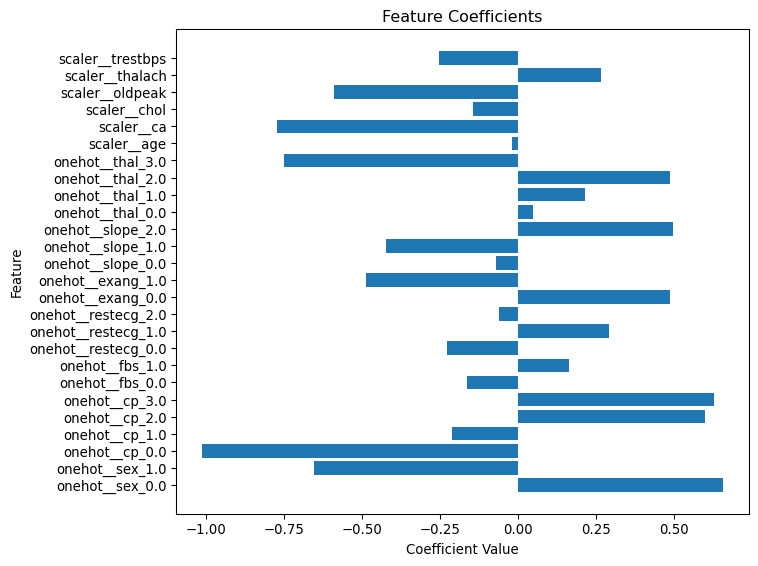

In [9]:
# Visualize the coefficients

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Positive coefficients** in a logistic regression model signify that
**higher values of the corresponding feature contribute positively** to
the probability of an example **belonging to ‘target = 1.0’**. Negative
coefficients indicate the opposite effect.

## Case study - coefficients (sorted)

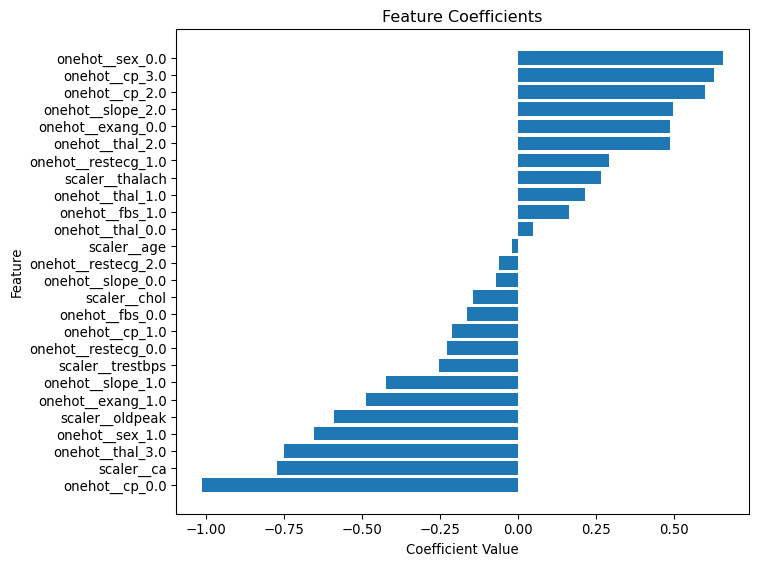

In [10]:
# Visualize the coefficients

plt.figure(figsize=(8, 6))
coef_df.sort_values(by='Coefficient', inplace=True)
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Definition

**Ordinal encoding** is a technique that assigns numerical values to
categorical attributes based on their inherent order or rank.

## Feature Engineering - Ordinal

For attributs with values such as **‘Poor’**, **‘Average’**, and
**‘Good’**, an ordinal encoding would make sense.

. . .

However!

In [11]:
from numpy import array
from sklearn.preprocessing import OrdinalEncoder

X =[['Poor'], ['Average'], ['Good'], ['Average'], ['Average']]

encoder = OrdinalEncoder()

encoder.fit(X)
encoder.transform(X)

array([[2.],
       [0.],
       [1.],
       [0.],
       [0.]])

## OrdinalEncoder (revised)

In [12]:
from numpy import array
from sklearn.preprocessing import OrdinalEncoder

X =[['Poor'], ['Average'], ['Good'], ['Average'], ['Average']]

encoder = OrdinalEncoder(categories=[['Poor', 'Average', 'Good']])

encoder.fit(X)

X_encoded = encoder.transform(X)

X_encoded

array([[0.],
       [1.],
       [2.],
       [1.],
       [1.]])

The desired order of the categories must be explicitly provided to the
encoder; otherwise, it defaults to alphabetical order.

An ordinal encoder is appropriate when categorical attributes have a
clear, inherent order or ranking, such as ‘Low’, ‘Medium’, and ‘High’,
or ‘Poor’, ‘Average’, and ‘Good’. This encoding method preserves the
ordinal relationships among categories.

When data is inherently ordinal, this encoding is more compact and can
be advantageous for machine learning models. However, if there is any
uncertainty about the ordinal nature of the data, it is safer to use a
`OneHotEncoder`.

## Definition

**Discretization** involves grouping ordinal values into discrete
categories.

AKA **binning**, **bucketing**, or **quantization**.

## Feature Engineering: Binning

**Example**: Categorizing ages into bins such as ‘infant’, ‘child’,
‘teen’, ‘adult’, and ‘senior citizen’.

. . .

**Advantages**:

-   Enables the algorithm to learn effectively with fewer training
    examples.

**Disadvantages**:

-   Requires domain expertise to define meaningful categories.
-   May lack generalizability; for example, the starting age for ‘senior
    citizen’ could be 60, 65, or 70[1].

Providing hints or predefined bins can help a decision tree algorithm
generate more compact trees, as it reduces the need for the classifier
to independently learn decision boundaries.

However, introducing such a strong bias may hinder the algorithm’s
ability to discover meaningful decision boundaries on its own.

Cross-validation is an effective method to determine the best encoding
scheme, but it is essential to withhold the test set until the final
evaluation phase of the project to prevent data leakage and ensure
unbiased assessment.

## FunctionTransformer

[1] Your instructor is concerned with your choice of cutoff

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer

bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']

transformer = FunctionTransformer(
    pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
)

X = np.array([0.5, 2, 15, 25, 97])
transformer.fit_transform(X)

['infant', 'kid', 'teen', 'adult', 'senior citizen']
Categories (5, object): ['infant' < 'kid' < 'teen' < 'adult' < 'senior citizen']

Se also:
[KBinsDiscretizer](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer)

# Scaling

## Normalization

Learning algorithms perform optimally when feature values have **similar
ranges**, such as \[-1,1\] or \[0,1\].

-   This accelerates optimization (e.g., gradient descent).

**Normalization**: $$
  \frac{x_i^{(j)} - \min^{(j)}}{\max^{(j)} - \min^{(j)}}
$$

**See:**
[sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

## Standardization

Standardization (AKA z-score normalization) transforms each feature to
have a **normal distribution** with a mean ($\mu$) of 0 and a standard
deviation ($\sigma$) of 1.

$$
\frac{x_i^{(j)} - \mu^{(j)}}{\sigma^{(j)}}
$$

**Note**: The range of values is not bounded!

**See:**
[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

## Standardization or Normalization?

-   Treat scaling as a hyperparameter and **evaluate both**
    normalization and standardization.
-   **Standardization** is generally more robust to **outliers** than
    normalization.
-   Guidelines from Andriy Burkov (2019), § 5:
    -   Use **standardization** for **unsupervised learning** tasks.
    -   Use **standardization** if features are approximately **normally
        distributed**.
    -   Prefer **standardization** in the presence of **outliers**.
    -   Otherwise, use **normalization**.

Do you see why standardization is generally more robust to **outliers**
than normalization?

An effective strategy for mitigating the impact of outliers in data is
the application of a logarithmic transformation to the values. This
technique reduces the skewness of the data, thereby diminishing the
disproportionate influence of extreme values.

## Case Study - Normal Distribution

In [14]:
import numpy as np
np.random.seed(7)

# Sample characteristics
sample_size = 1000
mu = 57
sigma = 7

# Generate values
norm_values = sigma * np.random.randn(sample_size) + mu

# Add three outliers
norm_values = np.append(norm_values, [92, 95, 98])

## Case Study - Normal Distribution

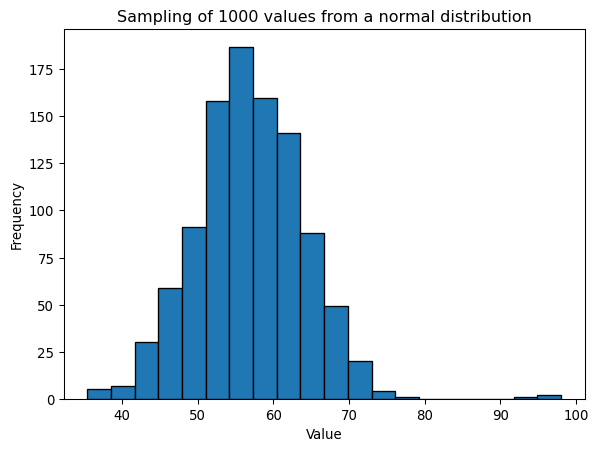

## Logarithm

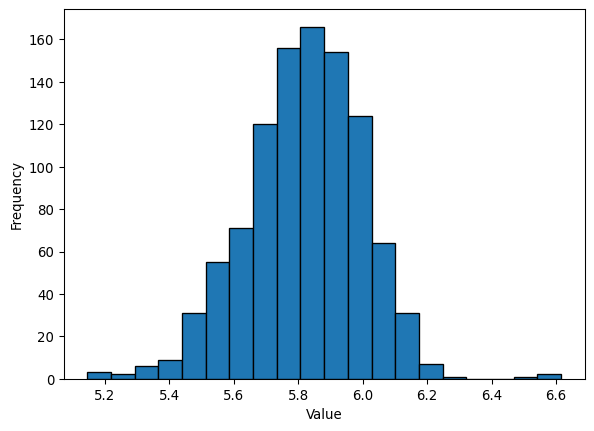

Logarithm of values from a normal distribution containing outliers.

## Normalization

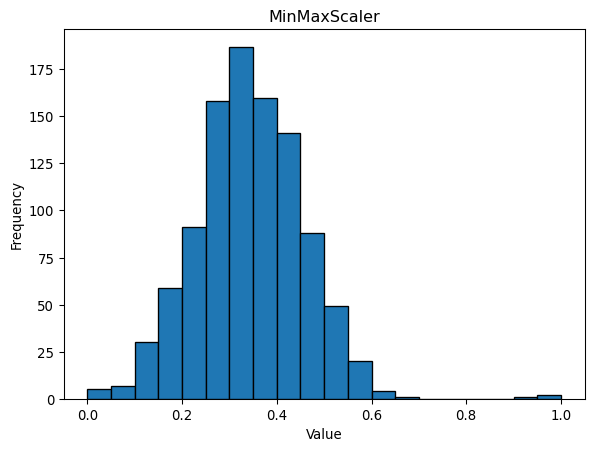

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_norm_values = scaler.fit_transform(norm_values.reshape(-1, 1))

# Plot the histogram
plt.hist(minmax_norm_values, bins=20, edgecolor='black')

plt.title(f'MinMaxScaler')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Normalization (`MinMaxScaler`) of values from a normal distribution
containing outliers.

## Standardization

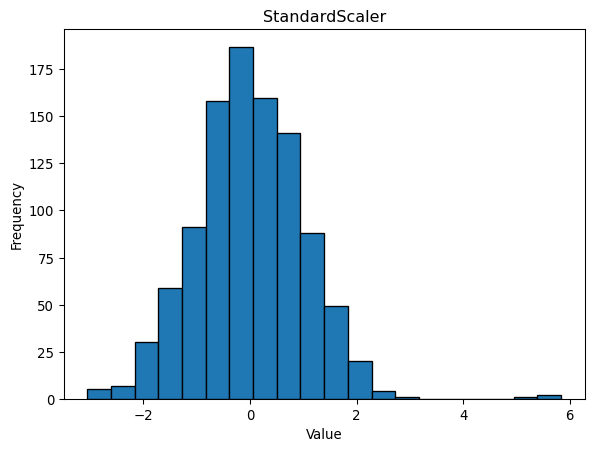

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standard_norm_values = scaler.fit_transform(norm_values.reshape(-1, 1))

# Plot the histogram
plt.hist(standard_norm_values, bins=20, edgecolor='black')

plt.title(f'StandardScaler')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Standardization (`StandardScaler`) of values from a normal distribution
containing outliers.

## Logarithm & Standardization

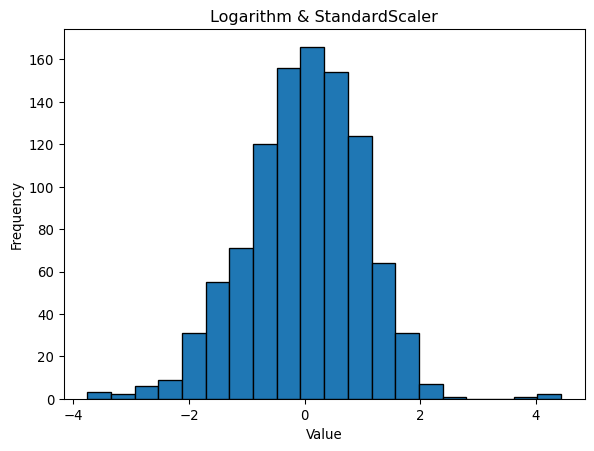

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standard_log_norm_values = scaler.fit_transform(log_norm_values.reshape(-1, 1))

# Plot the histogram
plt.hist(standard_log_norm_values, bins=20, edgecolor='black')

plt.title(f'Logarithm & StandardScaler')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Standardization (`StandardScaler`) of values from a normal distribution
containing outliers.

## Exponential Distribution

In [20]:
# Sample size
sample_size = 1000

# Generate values
exp_values = np.random.exponential(scale=4, size=sample_size) + 20

In the `NumPy` expression
`np.random.exponential(scale=4, size=sample_size) + 20`, the parameter
`scale` refers to the inverse rate (or the mean) of the exponential
distribution from which the random samples are generated. Specifically,
the exponential distribution is defined by its rate parameter, and
`scale` is the reciprocal of this rate, i.e.,
$\text{scale} = \frac{1}{\lambda}$.

Thus, `scale=4` means that the mean of the exponential distribution is
4. The argument `size=sample_size` specifies the number of random
samples to generate. After generating these samples, 20 is added to each
one, thus shifting the entire distribution by 20 units.

## Exponential Distribution

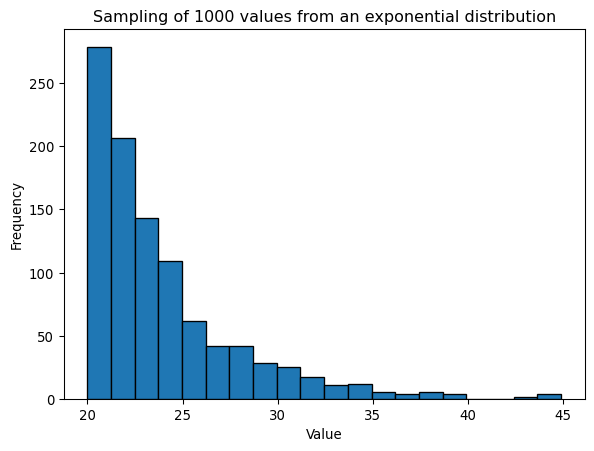

## Logarithm

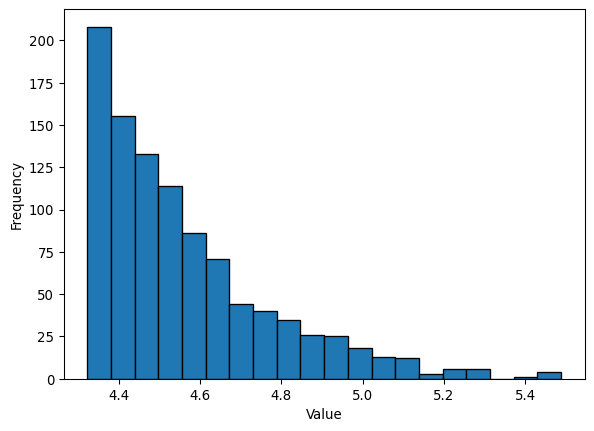

Logarithm of values from an exponential distribution.

## Normalization

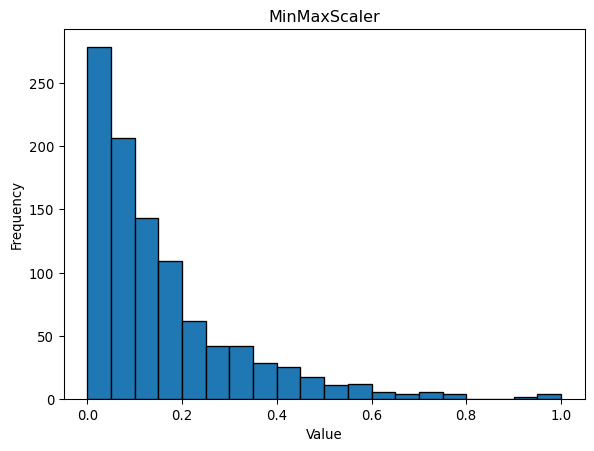

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_exp_values = scaler.fit_transform(exp_values.reshape(-1, 1))

# Plot the histogram
plt.hist(minmax_exp_values, bins=20, edgecolor='black')

plt.title(f'MinMaxScaler')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Normalization (`MinMaxScaler`) of values from an exponential
distribution.

## Standardization

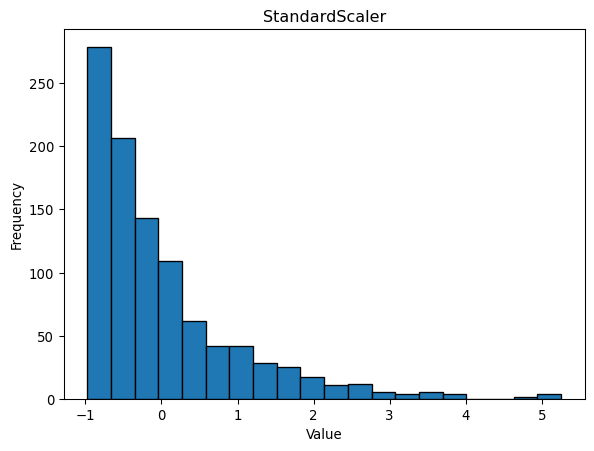

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standard_exp_values = scaler.fit_transform(exp_values.reshape(-1, 1))

# Plot the histogram
plt.hist(standard_exp_values, bins=20, edgecolor='black')

plt.title(f'StandardScaler')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Standardization (`StandardScaler`) of values from an exponential
distribution.

## Logarithm & Standardization

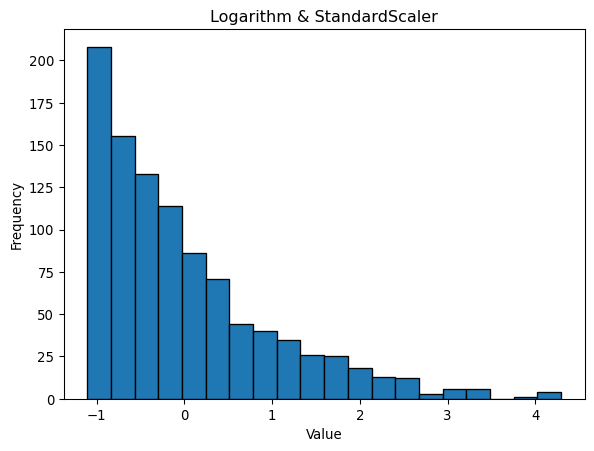

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standard_log_exp_values = scaler.fit_transform(log_exp_values.reshape(-1, 1))

# Plot the histogram
plt.hist(standard_log_exp_values, bins=20, edgecolor='black')

plt.title(f'Logarithm & StandardScaler')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Logarithm and standardization (`StandardScaler`) of values from an
exponential distribution.

# Missing Values

## Definition

**Missing values** refer to the absence of data points or entries in a
dataset where a value is expected.

**Age** is a good example, as some patients may withhold their age due
to privacy concerns.

## Handling Missing Values

-   **Drop Examples**
    -   Feasible if the dataset is **large** and **outcome is
        unaffected**.
-   **Drop Features**
    -   Suitable if it **does not impact** the project’s outcome.
-   **Use Algorithms Handling Missing Data**
    -   Example: `XGBoost`
    -   **Note**: Some algorithms like
        `sklearn.linear_model.LinearRegression` **cannot handle**
        missing values.
-   **Data Imputation**
    -   Replace missing values with computed values.

## Definition

**Data imputation** is the process of replacing missing values in a
dataset with substituted values, typically using statistical or machine
learning methods.

## Data Imputation Strategy

Replace missing values with **mean** or **median** of the **attribute**.

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

X = imputer.fit_transform(X)

. . .

-   **Cons**: Ignores feature correlations and complex relationships.

-   **Mode Imputation**: Replace missing values with the most frequent
    value; also ignores feature correlations.

Data imputation inherently relies on several assumptions, which may not
always hold true.

**Randomness Assumption**: Many methods (e.g., mean/median imputation)
assume that missingness is unrelated to any data.

**Model Bias**: Incorrect randomness assumptions can lead to biased
estimates and flawed conclusions.

**Information Loss**: Imputation can obscure patterns, leading to loss
of valuable information for advanced models.

Proceed with caution!

## Data Imputation Strategy

**Special Value Method**: Replace missing values with a value outside
the normal range (e.g., use -1 or 2 for data normalized between
\[0,1\]).

-   **Objective**: Enable the learning algorithm to recognize and
    appropriately handle missing values.

## Data Imputation Strategy

-   **Middle-Range Imputation**: Replace missing values with a value in
    the middle of the normal range (e.g., use 0 for data distributed in
    the range \[-1,1\]).

    -   **Categorical Data**: Use small non-zero numerical values.
        -   Example: Use \[0.25, 0.25, 0.25, 0.25\] instead of \[1, 0,
            0, 0\] for ‘Poor’, \[0, 1, 0, 0\] for ‘Everage’, \[0, 0, 1,
            0\] for ‘Good’, and \[0, 0, 0, 1\] for ‘Excellent’.
    -   **Objective**: Minimize the impact of imputed values on the
        results.

**Selection of Method**: The effectiveness of imputation methods can
vary, and it is essential to compare multiple techniques to determine
the best approach for your specific dataset.

## Alternative Approach

-   **Problem Definition**: Predict unknown (missing) labels for given
    examples.
-   Have you encountered this kind of problem before?
-   **Relevance**: This can be framed as a supervised learning problem.
    -   Let $\hat{x_i}$ be a new example:
        $[x_i^{(1)}, x_i^{(2)}, \ldots, x_i^{(j-1)}, x_i^{(j+1)}, \ldots, x_i^{(D)}]$.
    -   Let $\hat{y}_i = x_i^{j}$.
    -   **Training Set**: Use examples where $x_i^{j}$ is not missing.
    -   **Method**: Train a classifier on this set to predict (impute)
        the missing values.

## Using ML for Imputation

1.  **Instance-Based Method**:

    -   Use $k$ nearest neighbors (k-NN) to find the $k$ closest
        examples and impute using the non-missing values from the
        neighborhood.

2.  **Model-Based Methods**:

    -   Employ advanced techniques such as random forests, tensor
        decomposition, or deep neural networks.

## Why Use these Methods?

-   **Advantages**:
    -   Effectively handle complex relationships and correlations
        between features.
-   **Disadvantages**:
    -   Cost-intensive in terms of labor, CPU time, and memory
        resources.

# Class Imbalance

## Definition

The **class imbablance problem** is a scenario where the number of
instances in one class significantly outnumbers the instances in other
classes.

. . .

Models tend to be biased towards the **majority class**, leading to
**poor performance on the minority class**.

Standard evaluation metrics like accuracy may be misleading in the
presence of class imbalance.

## Solutions

-   **Resampling:** Techniques such as **oversampling** the minority
    class or **undersampling** the majority class.

-   **Algorithmic Adjustments:** Using cost-sensitive learning or
    modifying decision thresholds.

-   **Synthetic Data:** Generating synthetic samples for the minority
    class using methods like SMOTE (Synthetic Minority Over-sampling
    Technique).

Apply solutions only to the **training set** to prevents **data
leakage**.

Chawla et al. (2002) presents the original work, whereas Pradipta et al.
(2021) is a recent review.

**Oversampling**

-   **Oversampling** can lead to overfitting, especially if the
    synthetic samples are very similar to the existing ones.
-   **Impact**: The model may perform well on training data but
    generalize poorly to unseen data.

**Undersampling**

-   **Loss of Information** reduces the number of instances in the
    majority class.

-   **Impact**: Potentially discards valuable information and can lead
    to underfitting.

-   **Reduced Model Performance**: Smaller training dataset may not
    capture the complexity of the problem.

-   **Impact**: Can result in a less accurate and less robust model.

# Prologue

## Further readings

![](https://m.media-amazon.com/images/I/51XUfJm64KL._AC_UF350,350_QL50_.jpg)

-   [**Machine Learning
    Engineering**](http://www.mlebook.com/wiki/doku.php) by [Andriy
    Burkov](https://www.linkedin.com/in/andriyburkov) (A. Burkov 2020).
-   Covers data collection, storage, preprocessing, feature engineering,
    model testing and debugging, deployment, retirement, and
    maintenance.
-   From the author of [**The Hundred-Page Machine Learning
    Book**](https://themlbook.com) (Andriy Burkov 2019).
-   Available under a “read first, buy later” model.

## Summary

-   **Training Set Size**: Impact on model efficacy and generalization.
-   **Attribute Encoding**: Evaluation of techniques to avoid bias and
    possibly speed up the training.
-   **Preprocessing**:
    -   Data Scaling
    -   Handling Missing Values
    -   Managing Class Imbalance

## Next lecture

-   We will introduce artificial neural networks.

## References

Banko, Michele, and Eric Brill. 2001. “Scaling to Very Very Large
Corpora for Natural Language Disambiguation.” In *Proceedings of the
39th Annual Meeting on Association for Computational Linguistics*,
26–33. ACL ’01. USA: Association for Computational Linguistics.
<https://doi.org/10.3115/1073012.1073017>.

Burkov, A. 2020. *Machine Learning Engineering*. True Positive
Incorporated. <https://books.google.ca/books?id=HeXizQEACAAJ>.

Burkov, Andriy. 2019. *The Hundred-Page Machine Learning Book*. Andriy
Burkov.

Chawla, N V, K W Bowyer, L O Hall, and W P Kegelmeyer. 2002.
“<span class="nocase">SMOTE: Synthetic minority over-sampling
technique</span>.” *Journal of Artificial Intelligence Research* 16:
321–57.

Halevy, Alon, Peter Norvig, and Fernando Pereira. 2009.
“<span class="nocase">The Unreasonable Effectiveness of Data</span>.”
*IEEE Intelligent Systems* 24 (2): 8–12.

Kaplan, Jared, Sam McCandlish, Tom Henighan, Tom B. Brown, Benjamin
Chess, Rewon Child, Scott Gray, Alec Radford, Jeffrey Wu, and Dario
Amodei. 2020. “Scaling Laws for Neural Language Models.”
<https://arxiv.org/abs/2001.08361>.

Pradipta, Gede Angga, Retantyo Wardoyo, Aina Musdholifah, I Nyoman
Hariyasa Sanjaya, and Muhammad Ismail. 2021. “<span class="nocase">SMOTE
for Handling Imbalanced Data Problem : A Review</span>.” *2021 Sixth
International Conference on Informatics and Computing (ICIC)* 00: 1–8.
<https://doi.org/10.1109/icic54025.2021.9632912>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

Sakai, Masato, Akihisa Sakurai, Siyuan Lu, Jorge Olano, Conrad M.
Albrecht, Hendrik F. Hamann, and Marcus Freitag. 2024.
“<span class="nocase">AI-accelerated Nazca survey nearly doubles the
number of known figurative geoglyphs and sheds light on their
purpose</span>.” *Proceedings of the National Academy of Sciences* 121
(40): e2407652121. <https://doi.org/10.1073/pnas.2407652121>.

Shumailov, Ilia, Zakhar Shumaylov, Yiren Zhao, Nicolas Papernot, Ross
Anderson, and Yarin Gal. 2024. “<span class="nocase">AI models collapse
when trained on recursively generated data</span>.” *Nature* 631 (8022):
755–59. <https://doi.org/10.1038/s41586-024-07566-y>.

# Appendix: Pipeline

## Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
        ])

training_num_tr = num_pipeline.fit_transform(training_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), ["sequence"]),
    ])

training_prepared = full_pipeline.fit_transform(training)

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa

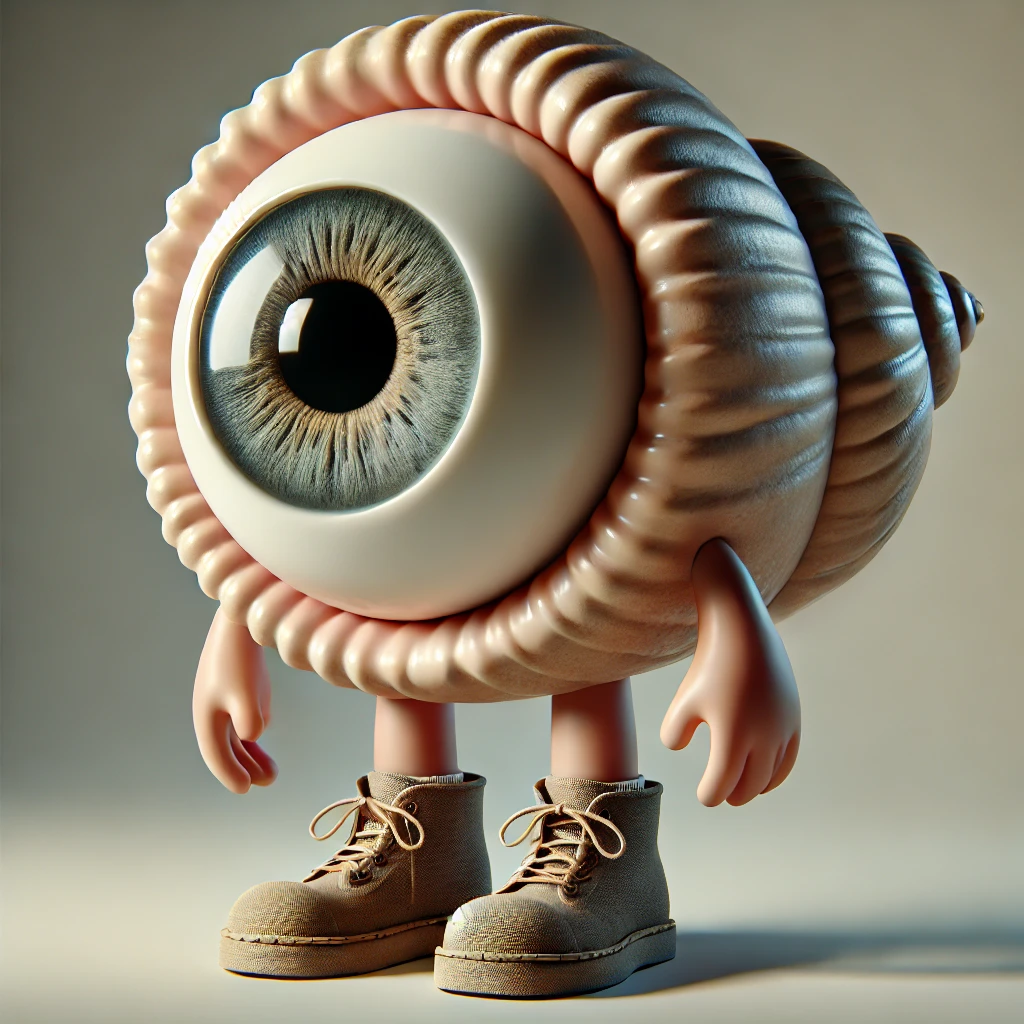

**Attribution**: Generated by DALL-E, via ChatGPT (GPT-4), OpenAI,
September 30, 2024.

See next page for interactions.

## GPT-4o interactions 2024-09-30

**I presented GPT-4o with an image of the main character from [Marcel
the Shell With Shoes
On](https://a24films.com/films/marcel-the-shell-with-shoes-on) and had
the following interactions.**

**Marcel:** How would you describe the subject of the image, its
artistic quality, technique, and rendering style?

**GPT-4o**: The image depicts a whimsical character that resembles a
small shell with one large, expressive eye. It stands on two legs
wearing shoes, giving it a cute and almost anthropomorphic appearance.
The character has a surreal and quirky look, which lends it a sense of
personality and charm.

**Artistic Quality**:

The image is rendered with a high degree of polish and smoothness,
possibly created digitally. The textures, shading, and lighting are soft
and subtle, giving the character a smooth and rounded look. The
rendering captures a delicate balance between realism (in the textures
of the shell and shoes) and cartoon-like abstraction (in the exaggerated
eye and small stature).

**Technique**:

The artist appears to have employed a blend of digital painting and
3D-like modeling techniques, with careful attention to detail in the
reflections in the eye and the textures of the shell and shoes. The
color palette is muted, using soft tones that evoke a gentle, friendly
atmosphere.

**Rendering Style**:

The rendering style is a mix of minimalist and hyperrealist elements.
The minimalism is seen in the simplified forms of the
character—particularly the body and legs—while the hyperrealism comes
through in the detailing of the eye and the subtle textures. This gives
the character a tactile, almost tangible quality while maintaining its
fantastical, imaginative essence.

The overall effect of the design is both charming and surreal, combining
everyday objects (a shell, shoes) with anthropomorphic and fantastical
elements to create a unique, playful character.

**Marcel:** Create an image based on the following description: The
image depicts a whimsical character that resembles a small shell with
one large, expressive eye. It stands on two legs wearing shoes, giving
it a cute and almost anthropomorphic appearance. The character has a
surreal and quirky look, which lends it a sense of personality and
charm.

**Artistic Quality**:

The image is rendered with a high degree of polish and smoothness,
possibly created digitally. The textures, shading, and lighting are soft
and subtle, giving the character a smooth and rounded look. The
rendering captures a delicate balance between realism (in the textures
of the shell and shoes) and cartoon-like abstraction (in the exaggerated
eye and small stature).

**Technique**:

The artist appears to have employed a blend of digital painting and
3D-like modeling techniques, with careful attention to detail in the
reflections in the eye and the textures of the shell and shoes. The
color palette is muted, using soft tones that evoke a gentle, friendly
atmosphere.

**Rendering Style**:

The rendering style is a mix of minimalist and hyperrealist elements.
The minimalism is seen in the simplified forms of the
character—particularly the body and legs—while the hyperrealism comes
through in the detailing of the eye and the subtle textures. This gives
the character a tactile, almost tangible quality while maintaining its
fantastical, imaginative essence.

The overall effect of the design is both charming and surreal, combining
everyday objects (a shell, shoes) with anthropomorphic and fantastical
elements to create a unique, playful character.

**GTP-4o**: Here is the image based on the description you provided. Let
me know if you’d like to make any adjustments!